In [1]:
from snAPI.Main import *
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
sn=snAPI()

In [19]:
filename='C:/Users/NEXT-BOLD/Documents/MIKEL/Dropbox/Proyectos/data/APD/Marker_test/default.ptu'
os.listdir(filename)

NotADirectoryError: [WinError 267] El nombre del directorio no es válido: 'C:/Users/NEXT-BOLD/Documents/MIKEL/Dropbox/Proyectos/data/APD/Marker_test/default.ptu'

In [20]:
sn.getFileDevice(filename)
sn.initDevice(MeasMode.T2)
t_resol=sn.deviceConfig['Resolution']/1000 #in ns
sn.raw.measure()
data = sn.raw.getData()
channels=sn.raw.channel(data)
dTimes=sn.raw.dTime_T3(data)[np.where(channels!=64)]*t_resol
dataChannels=channels[np.where(channels!=64)]
sn.unfold.measure()
absTimes=sn.unfold.getData()[0]/1e3 # in ns
df=pd.DataFrame(np.array([dTimes,absTimes,dataChannels]).T,columns=['dTimes','absTimes','Channels'])
sn.closeDevice()

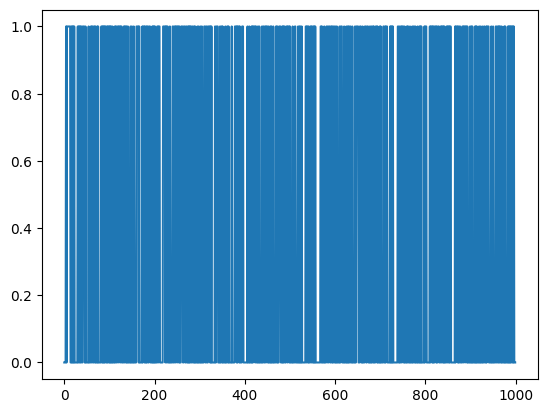

In [23]:
plt.plot(sn.raw.markers(data)[1][0:1000])

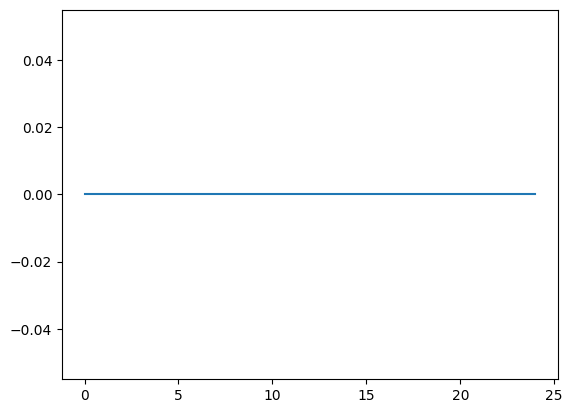

In [6]:
plt.plot(sn.raw.markers(data)[2][0:1000])